# Libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
from scipy.optimize import curve_fit

# Dataset 1:

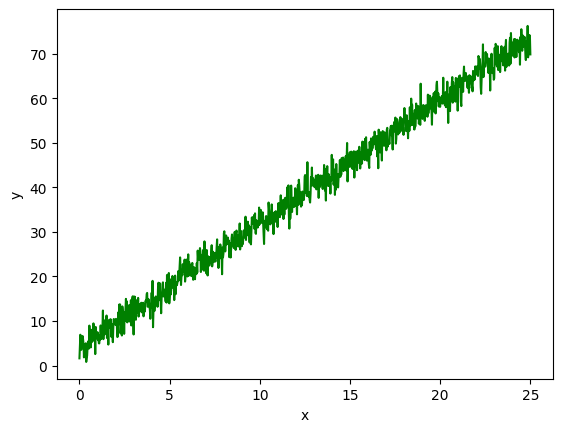

In [2]:
k1=open('dataset1w3.txt',"r")
n1=k1.readlines()
x1=[]
y1=[]
for line in n1:
    p=line.split()
    x1.append(float(p[0]))
    y1.append(float(p[1]))
x1=np.array(x1)
y1=np.array(y1)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x1,y1,c='g')
plt.show()

In [3]:
M = np.column_stack([x1, np.ones(len(x1))])
(p1, p2), _, _, _ = np.linalg.lstsq(M, y1, rcond=None)
print(f"The estimated equation is {p1} t + {p2}")

The estimated equation is 2.791124245414918 t + 3.848800101430742


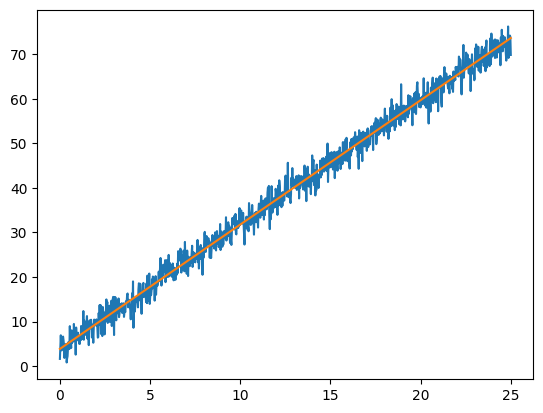

In [4]:
def stline(x, m, c):
    return m * x + c
yn=stline(x1,p1,p2)
plt.plot(x1,y1,x1,yn)

2.7911242448201588 3.848800111263445


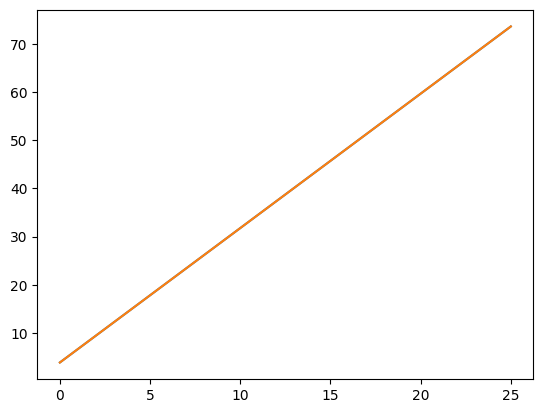

In [6]:
(m,c),cov=curve_fit(stline,x1,y1)
print(m,c)
ym=stline(x1,m,c)
plt.plot(x1,yn,x1,ym)

As we can see from the above plot lstsq and curve_fit alsomt gave same answer(upto 10 decimals), so we can use either of them.

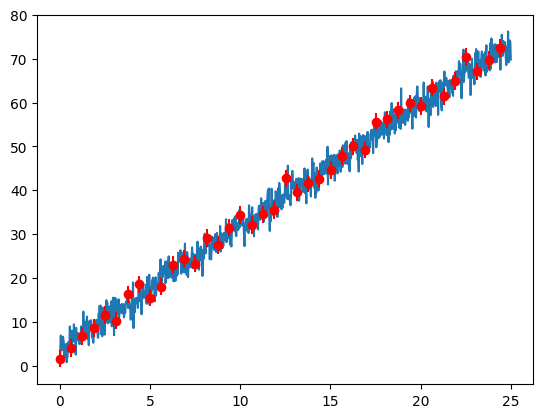

1.9958487870009778


In [59]:
plt.plot(x1,y1)
plt.errorbar(x1[::25], y1[::25], np.std(yn-y1), fmt='ro') 
plt.show()

The size of the errorbars is the third argument in plt.errorbar() and in the above code its mentioned as np.std(), which gives standard deviation.It is calculated as shown below.

In [58]:
def stddev(x1):
    j=len(x1)
    s=sum(x1)/j
    sd=[(X-s)**2 for X in x1]
    dev=math.sqrt(sum(sd)/j)
    return dev
print(stddev(yn-y1))

1.9958487870009785


# Dataset 2:

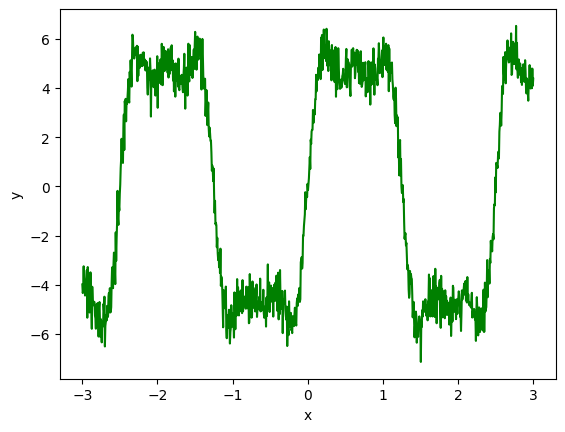

In [7]:
k1=open('dataset2w3.txt',"r")
n1=k1.readlines()
x1=[]
y1=[]
for line in n1:
    p=line.split()
    x1.append(float(p[0]))
    y1.append(float(p[1]))
x1=np.array(x1)
y1=np.array(y1)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x1,y1,c='g')
plt.show()

For using curve_fit, we need to know the function and it estimates any variables in the function.So by observing graohs of fourier transforms of sum of sin waves, we can conclude the given plot is sum of 3 sine harmonics.And to determine which harmonics, I tried plotting different harmonics and 1,3,5 matches the given plot.Then I used curve_fit to estimate frequency and amplitudes.And non linear fitting is better since the plot is non linear.

6.011120030226662 2.001458608426161 0.9809070269021316 0.3999141230975358


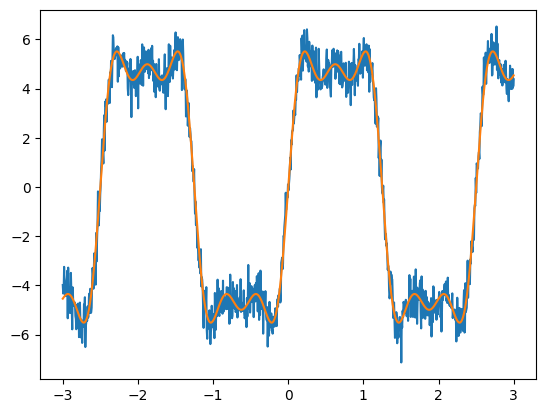

In [8]:
def f(t,a1,a2,a3,p):
    return a1 * np.sin(2 * np.pi * p * t)+a2 * np.sin(2 * np.pi * p*3 * t)+a3 * np.sin(2 * np.pi * p*5 * t)

(a1,a2,a3,p),cov = curve_fit(f, x1, y1,p0=(1,1,1,0.35))   
print(a1,a2,a3,p)
plt.plot(x1,y1)
y2=f(x1,a1,a2,a3,p)
plt.plot(x1,y2)

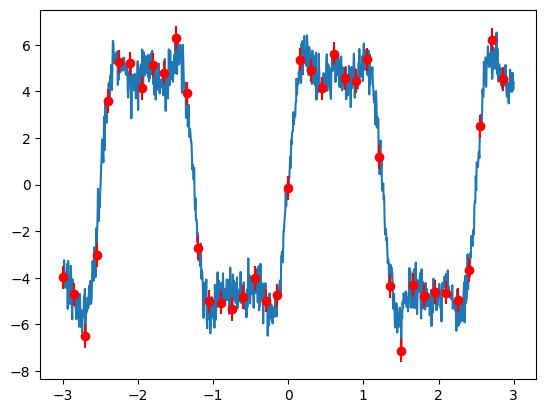

In [23]:
plt.plot(x1,y1)
plt.errorbar(x1[::25], y1[::25], np.std(y2-y1), fmt='ro') 
plt.show()

# Dataset 3:

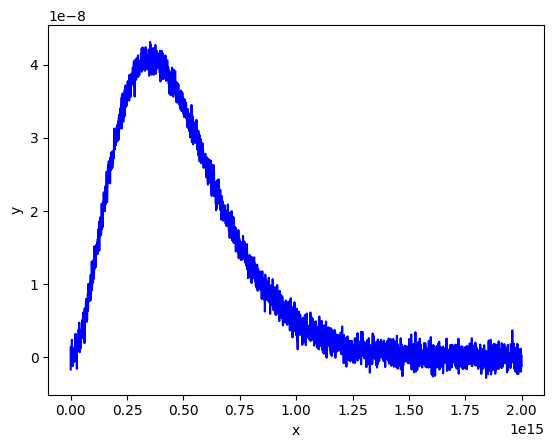

In [10]:
k1=open('dataset3w3.txt',"r")
n1=k1.readlines()
x1=[]
y1=[]
for line in n1:
    p=line.split()
    x1.append(float(p[0]))
    y1.append(float(p[1]))
x1=np.array(x1)
y1=np.array(y1)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x1,y1,c='b')
plt.show()

The value of planck's constant is 6.643229765102559e-34 and the temperature at which these observations are taken is 6011.361525876954k


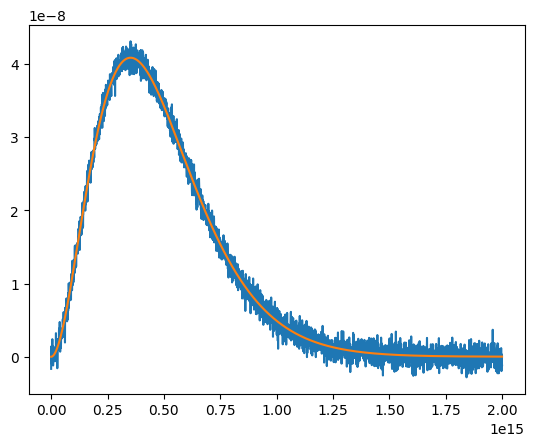

In [11]:
def planck_law(x,t,h):
    c=3.0e8
    k=1.38e-23
    #x=c/x
    return (2*h*(x**3))/((c**2)*(np.exp(h*x/(k*t))-1))
(t,h),pcov=curve_fit(planck_law,x1,y1,p0=[1000,1e-34])
print(f"The value of planck's constant is {h} and the temperature at which these observations are taken is {t}k")
y3=planck_law(x1,t,h)
plt.plot(x1,y1)
plt.plot(x1,y3)

Here since the function is complex, we have to some initial guess so it will return correct answer.

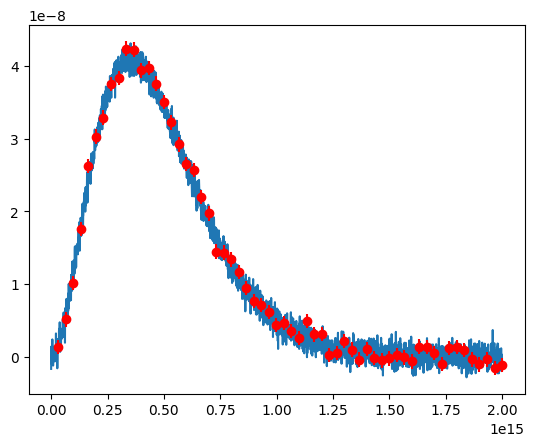

In [29]:
plt.plot(x1,y1)
plt.errorbar(x1[::50], y1[::50], np.std(y3-y1), fmt='ro') 
plt.show()